pip install numpy pandas seaborn matplotlib scipy statsmodels panel



<b>1.Central Tendency </b>

Mean Tip: 2.99827868852459
Median Tip: 2.9
Mode Tip: 2.0
Tip Std Dev: 1.3836381890011822
Tip Range: 9.0


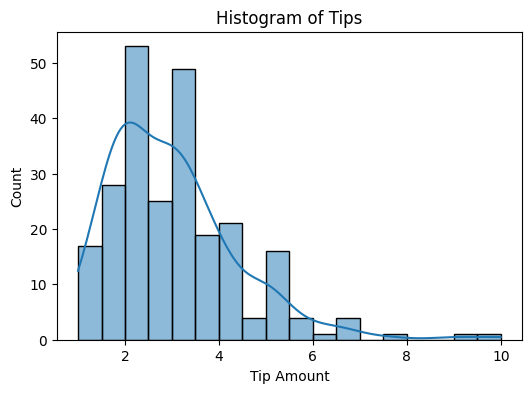

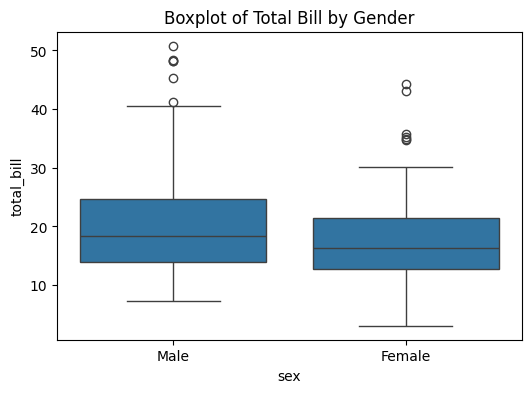

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load a simple dataset
tips = sns.load_dataset('tips')

# Central Tendency
print("Mean Tip:", tips['tip'].mean())
print("Median Tip:", tips['tip'].median())
print("Mode Tip:", tips['tip'].mode()[0])

# Dispersion
print("Tip Std Dev:", tips['tip'].std())
print("Tip Range:", tips['tip'].max() - tips['tip'].min())

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(tips['tip'], kde=True)
plt.title("Histogram of Tips")
plt.xlabel("Tip Amount")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='total_bill', data=tips)
plt.title("Boxplot of Total Bill by Gender")
plt.show()



<b>2. Level: Distributions & Inferential Statistics</b>

Probability distributions (normal, binomial, uniform)
Central Limit Theorem
Confidence intervals
t-tests and p-values

/Users/eabhattacharyya/model_explain/lib/python3.13/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/eabhattacharyya/model_explain/lib/python3.13/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/eabhattacharyya/model_explain/lib/python3.13/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


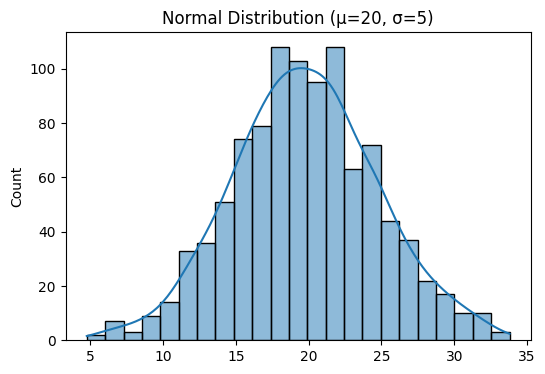

In [4]:
from scipy import stats

# Distribution plot (Normal Distribution)
np.random.seed(0)
samples = np.random.normal(loc=20, scale=5, size=1000)

plt.figure(figsize=(6,4))
sns.histplot(samples, kde=True)
plt.title("Normal Distribution (μ=20, σ=5)")
plt.show()


In [5]:
# Confidence Interval for Tips Mean
ci_low, ci_high = stats.t.interval(
    0.95, len(tips['tip'])-1, loc=tips['tip'].mean(), scale=stats.sem(tips['tip'])
)
print("95% Confidence Interval for Mean Tip: {:.2f} to {:.2f}".format(ci_low, ci_high))

95% Confidence Interval for Mean Tip: 2.82 to 3.17


In [6]:
# t-test: Are mean tips for smokers and non-smokers different?
smokers = tips[tips['smoker']=='Yes']['tip']
nonsmokers = tips[tips['smoker']=='No']['tip']

t_stat, p_value = stats.ttest_ind(smokers, nonsmokers, equal_var=False)
print(f"T-test Stat: {t_stat:.2f}, p-value: {p_value:.3f}")

T-test Stat: 0.09, p-value: 0.927


<b>3. Regression, ANOVA, and Hypothesis Testing</b>

Linear regression
ANOVA (Analysis of Variance)
Nonparametric tests

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simple Linear Regression: total_bill ~ tip
model = smf.ols('tip ~ total_bill', data=tips).fit()
print(model.summary())

# Plot regression line
plt.figure(figsize=(6,4))
sns.regplot(x="total_bill", y="tip", data=tips)
plt.title("Regression: Tip vs. Total Bill")
plt.show()

# ANOVA: Is total_bill different across days?
anova_model = smf.ols('total_bill ~ C(day)', data=tips).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

# Nonparametric (Mann-Whitney U): Are days different for tip distribution?
mw_stat, mw_p = stats.mannwhitneyu(
    tips[tips['day']=='Sun']['tip'],
    tips[tips['day']=='Thur']['tip'],
    alternative='two-sided'
)
print(f"Mann-Whitney U test: Statistic={mw_stat:.2f}, p={mw_p:.3f}")



ModuleNotFoundError: No module named 'statsmodels'

<b>4. A/B Testing</b>

A/B testing is key in product and business analytics. You split data into two groups (A: control, B: test) and see if there’s a statistically significant difference.
Scenario:
Suppose we want to see if a new tip-suggestion system increases average tips.

In [ ]:
n = 200
np.random.seed(42)
group_a = np.random.normal(loc=3.0, scale=1.0, size=n)  # Control group tips
group_b = np.random.normal(loc=3.3, scale=1.0, size=n)  # Test group tips (0.3 higher mean)

ab_df = pd.DataFrame({'tip': np.concatenate([group_a, group_b]),
                      'group': ['A']*n + ['B']*n})

# Visualize
plt.figure(figsize=(6,4))
sns.boxplot(x='group', y='tip', data=ab_df)
plt.title("A/B Test: Tip Amount by Group")
plt.show()

# t-test for difference in means
t_stat, p_val = stats.ttest_ind(ab_df[ab_df['group'] == 'A']['tip'],
                                ab_df[ab_df['group'] == 'B']['tip'],
                                equal_var=False)
print(f"A/B Test t-stat={t_stat:.2f}, p-value={p_val:.4f}")
if p_val < 0.05:
    print("Result: Statistically significant difference!")
else:
    print("Result: No significant difference between groups.")